In [1]:
import json
import requests
import pandas as pd
from flatten_json import flatten
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string 

In [2]:
# Function to flattening the json
def flatten_json(y):
    out = {}
    def flatten(x, name=''):
        # If the Nested key-value
        # pair is of dict type
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        # If the Nested key-value
        # pair is of list type
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

In [5]:
# loads json from the guardian
current_page = 1
total_pages = 50

api_endpoint = 'https://content.guardianapis.com/search'

query = {'section': 'environment',
                'from-date': "2013-01-01",
                'to-date': "2022-12-31",
                'order-by': 'oldest',
                'page-size': 200,
                'q': '"climate change"',
                'page': 0,
                'show-fields': 'all',
                'type': 'article',
                'api-key': '7d0c9d9e-6f75-450b-9822-cc24c86399ec'}


corpus = []
docs = []
timestamps = []

while current_page <= total_pages:
    try:
        #r = requests.get('https://content.guardianapis.com/search?section=environment&tag=environment%2Fenergy&from-date=2000-01-01&order-by=oldest&page-size=200&q=climate%20change%20and%20finance&api-key=test&page='+str(current_page))
        query['page'] = current_page
        r = requests.get(api_endpoint, query)
        r.raise_for_status()
    except:
        SystemExit(err)
    data = r.json()['response']
    corpus.extend(data['results'])
    current_page += 1
    total_pages = data['pages']

for i in range(len(corpus)):
    corpus[i] = flatten_json(corpus[i])
    
with open('guardian.json', 'w') as f:
    f.write(json.dumps(corpus, indent = 2))

In [6]:
# Checks
print(len(corpus))
print(len(corpus[1]))
# Ok
print(total_pages)

9785
35
49


In [7]:
df = pd.read_json(r'C:\Users\gian-\OneDrive\Documents\GitHub\pmda\guardian.json')
print(df.loc[0])

id                                      environment/2013/dec/31/climate-change-green-e...
type                                                                              article
sectionId                                                                     environment
sectionName                                                                   Environment
webPublicationDate                                                   2013-01-01T12:46:00Z
webTitle                                Great storytelling is vital to winning the gre...
webUrl                                  https://www.theguardian.com/environment/2013/d...
apiUrl                                  https://content.guardianapis.com/environment/2...
fields_headline                         Great storytelling is vital to winning the gre...
fields_standfirst                       Stories with deep cultural resonance allow peo...
fields_trailText                        <p><strong>Andrew Simms</strong>: Stories with...
fields_byl

In [8]:
# Check
print(type(df.iat[0, 13])) # Check if it is a string
df

<class 'str'>


id     type    sectionId  \
0     environment/2013/dec/31/climate-change-green-e...  article  environment   
1     environment/blog/2013/jan/02/olympics-2012-glo...  article  environment   
2     environment/2013/jan/03/gm-food-british-public...  article  environment   
3     environment/2013/jan/03/2012-uk-second-wettest...  article  environment   
4     environment/2013/jan/03/environmental-crisis-d...  article  environment   
...                                                 ...      ...          ...   
9780  environment/2022/dec/28/insects-20-quadrillion...  article  environment   
9781  environment/2022/dec/28/how-to-build-on-the-su...  article  environment   
9782  environment/2022/dec/29/i-am-an-optimistic-per...  article  environment   
9783  environment/2022/dec/30/key-us-climate-emergen...  article  environment   
9784  environment/2022/dec/30/environmental-review-o...  article  environment   

      sectionName    webPublicationDate  \
0     Environment  2013-01-01T12:46:00Z   
1     Environment  2013-01-02T13:08:00Z   
2     Environment  2013-01-03T06:00:00Z   
3     Environment  2013-01-03T14:44:00Z   
4     Environment  2013-01-03T21:00:04Z   
...           ...                   ...   
9780  Environment  2022-12-28T08:00:45Z   
9781  Environment  2022-12-28T17:37:50Z   
9782  Environment  2022-12-29T14:30:21Z   
9783  Environment  2022-12-30T11:00:47Z   
9784  Environment  2022-12-30T12:09:51Z   

                                               webTitle  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4     Letters: Environmental crisis demands big thin...   
...                                                 ...   
9780  Insects and us: a mind-blowing 20 quadrillion ...   
9781  How to build on the success of Cop15 agreement...   
9782  ‘I am an optimistic person’: the scientist who...   
9783  US response to the climate emergency: key mome...   
9784  Environmental review of 2022: another mile on ...   

                                                 webUrl  \
0     https://www.theguardian.com/environment/2013/d...   
1     https://www.theguardian.com/environment/blog/2...   
2     https://www.theguardian.com/environment/2013/j...   
3     https://www.theguardian.com/environment/2013/j...   
4     https://www.theguardian.com/environment/2013/j...   
...                                                 ...   
9780  https://www.theguardian.com/environment/2022/d...   
9781  https://www.theguardian.com/environment/2022/d...   
9782  https://www.theguardian.com/environment/2022/d...   
9783  https://www.theguardian.com/environment/2022/d...   
9784  https://www.theguardian.com/environment/2022/d...   

                                                 apiUrl  \
0     https://content.guardianapis.com/environment/2...   
1     https://content.guardianapis.com/environment/b...   
2     https://content.guardianapis.com/environment/2...   
3     https://content.guardianapis.com/environment/2...   
4     https://content.guardianapis.com/environment/2...   
...                                                 ...   
9780  https://content.guardianapis.com/environment/2...   
9781  https://content.guardianapis.com/environment/2...   
9782  https://content.guardianapis.com/environment/2...   
9783  https://content.guardianapis.com/environment/2...   
9784  https://content.guardianapis.com/environment/2...   

                                        fields_headline  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4             Environmental crisis demands big thinking   
...                                                 ...   
9780  Insects and us: a

In [9]:
# Types and lang and no text
df_1 = df[df['type'] == 'article']
df_1
df_2 = df_1[df_1['fields_lang'] == 'en']
df_2
df_3 = df_2[df_2["fields_wordcount"] != 0]
df_3

id     type    sectionId  \
0     environment/2013/dec/31/climate-change-green-e...  article  environment   
1     environment/blog/2013/jan/02/olympics-2012-glo...  article  environment   
2     environment/2013/jan/03/gm-food-british-public...  article  environment   
3     environment/2013/jan/03/2012-uk-second-wettest...  article  environment   
4     environment/2013/jan/03/environmental-crisis-d...  article  environment   
...                                                 ...      ...          ...   
9780  environment/2022/dec/28/insects-20-quadrillion...  article  environment   
9781  environment/2022/dec/28/how-to-build-on-the-su...  article  environment   
9782  environment/2022/dec/29/i-am-an-optimistic-per...  article  environment   
9783  environment/2022/dec/30/key-us-climate-emergen...  article  environment   
9784  environment/2022/dec/30/environmental-review-o...  article  environment   

      sectionName    webPublicationDate  \
0     Environment  2013-01-01T12:46:00Z   
1     Environment  2013-01-02T13:08:00Z   
2     Environment  2013-01-03T06:00:00Z   
3     Environment  2013-01-03T14:44:00Z   
4     Environment  2013-01-03T21:00:04Z   
...           ...                   ...   
9780  Environment  2022-12-28T08:00:45Z   
9781  Environment  2022-12-28T17:37:50Z   
9782  Environment  2022-12-29T14:30:21Z   
9783  Environment  2022-12-30T11:00:47Z   
9784  Environment  2022-12-30T12:09:51Z   

                                               webTitle  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4     Letters: Environmental crisis demands big thin...   
...                                                 ...   
9780  Insects and us: a mind-blowing 20 quadrillion ...   
9781  How to build on the success of Cop15 agreement...   
9782  ‘I am an optimistic person’: the scientist who...   
9783  US response to the climate emergency: key mome...   
9784  Environmental review of 2022: another mile on ...   

                                                 webUrl  \
0     https://www.theguardian.com/environment/2013/d...   
1     https://www.theguardian.com/environment/blog/2...   
2     https://www.theguardian.com/environment/2013/j...   
3     https://www.theguardian.com/environment/2013/j...   
4     https://www.theguardian.com/environment/2013/j...   
...                                                 ...   
9780  https://www.theguardian.com/environment/2022/d...   
9781  https://www.theguardian.com/environment/2022/d...   
9782  https://www.theguardian.com/environment/2022/d...   
9783  https://www.theguardian.com/environment/2022/d...   
9784  https://www.theguardian.com/environment/2022/d...   

                                                 apiUrl  \
0     https://content.guardianapis.com/environment/2...   
1     https://content.guardianapis.com/environment/b...   
2     https://content.guardianapis.com/environment/2...   
3     https://content.guardianapis.com/environment/2...   
4     https://content.guardianapis.com/environment/2...   
...                                                 ...   
9780  https://content.guardianapis.com/environment/2...   
9781  https://content.guardianapis.com/environment/2...   
9782  https://content.guardianapis.com/environment/2...   
9783  https://content.guardianapis.com/environment/2...   
9784  https://content.guardianapis.com/environment/2...   

                                        fields_headline  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4             Environmental crisis demands big thinking   
...                                                 ...   
9780  Insects and us: a

In [10]:
# Select columns
df_3 = df_3.loc[:, ['id', 'type','fields_headline','fields_standfirst','fields_byline','fields_body','fields_wordcount','webPublicationDate','fields_publication','fields_lang','fields_bodyText']]
df_3

id     type  \
0     environment/2013/dec/31/climate-change-green-e...  article   
1     environment/blog/2013/jan/02/olympics-2012-glo...  article   
2     environment/2013/jan/03/gm-food-british-public...  article   
3     environment/2013/jan/03/2012-uk-second-wettest...  article   
4     environment/2013/jan/03/environmental-crisis-d...  article   
...                                                 ...      ...   
9780  environment/2022/dec/28/insects-20-quadrillion...  article   
9781  environment/2022/dec/28/how-to-build-on-the-su...  article   
9782  environment/2022/dec/29/i-am-an-optimistic-per...  article   
9783  environment/2022/dec/30/key-us-climate-emergen...  article   
9784  environment/2022/dec/30/environmental-review-o...  article   

                                        fields_headline  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4             Environmental crisis demands big thinking   
...                                                 ...   
9780  Insects and us: a mind-blowing 20 quadrillion ...   
9781    How to build on the success of Cop15 agreement    
9782  ‘I am an optimistic person’: the scientist who...   
9783  US response to the climate emergency: key mome...   
9784  Environmental review of 2022: another mile on ...   

                                      fields_standfirst  \
0     Stories with deep cultural resonance allow peo...   
1     It will take the equivalent collective effort ...   
2     Owen Paterson tells farming conference that GM...   
3     Met Office figures show past 12 months of rain...   
4                                                   NaN   
...                                                 ...   
9780  <p>There are 2.5m of these tiny creatures for ...   
9781  <p><strong>Ian Rappel </strong>says we should ...   
9782  <p>Friederike Otto, a member of the world’s on...   
9783  <p>Biden’s Inflation Reduction Act is one step...   
9784  <p>Deadly floods in Pakistan and record heat i...   

                                 fields_byline  \
0                                 Andrew Simms   
1                                 Andrew Simms   
2      Fiona Harvey, environment correspondent   
3                            Damian Carrington   
4                                          NaN   
...                                        ...   
9780                                Anna Turns   
9781                                       NaN   
9782  Sandra Laville Environment correspondent   
9783                             Oliver Milman   
9784      Damian Carrington Environment editor   

                                            fields_body  fields_wordcount  \
0     <p>Slowly and painfully it's dawning on campai...              1020   
1     <p>"Extraordinary", "amazing" - the ritual rev...               876   
2     <p>The British public should be persuaded of t...               946   
3     <p>2012 was the <a href="http://www.metoffice....               644   
4     <p>As an engineer, I agree with your <a href="...               414   
...                                                 ...               ...   
9780  <p>To most of us, they are small, uninterestin...              1089   
9781  <p>To generate lasting hope from the Cop15 out...               349   
9782  <p>Cycling over London Bridge as the dry heat ...              1077   
9783  <p>The climate crisis inflicted painful wounds...              1846   
9784  <p>Two events in 2022 symbolised the climate b...              1955   

        webPublicationDate fields_publication fields_lang  \
0     2013-01-01T12:46:00Z    theguardian.com          en   
1     2013-01-02T13:08:00Z    theguardian.com          en   
2     2013-01-03T06:00:00Z    theguardian.com          en   
3     2013-01-03T14:44:00Z       The Guardian   

In [11]:
# Date trasformation
df_3['webPublicationDate'] = pd.to_datetime(df_3['webPublicationDate']).dt.year
df_3

id     type  \
0     environment/2013/dec/31/climate-change-green-e...  article   
1     environment/blog/2013/jan/02/olympics-2012-glo...  article   
2     environment/2013/jan/03/gm-food-british-public...  article   
3     environment/2013/jan/03/2012-uk-second-wettest...  article   
4     environment/2013/jan/03/environmental-crisis-d...  article   
...                                                 ...      ...   
9780  environment/2022/dec/28/insects-20-quadrillion...  article   
9781  environment/2022/dec/28/how-to-build-on-the-su...  article   
9782  environment/2022/dec/29/i-am-an-optimistic-per...  article   
9783  environment/2022/dec/30/key-us-climate-emergen...  article   
9784  environment/2022/dec/30/environmental-review-o...  article   

                                        fields_headline  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4             Environmental crisis demands big thinking   
...                                                 ...   
9780  Insects and us: a mind-blowing 20 quadrillion ...   
9781    How to build on the success of Cop15 agreement    
9782  ‘I am an optimistic person’: the scientist who...   
9783  US response to the climate emergency: key mome...   
9784  Environmental review of 2022: another mile on ...   

                                      fields_standfirst  \
0     Stories with deep cultural resonance allow peo...   
1     It will take the equivalent collective effort ...   
2     Owen Paterson tells farming conference that GM...   
3     Met Office figures show past 12 months of rain...   
4                                                   NaN   
...                                                 ...   
9780  <p>There are 2.5m of these tiny creatures for ...   
9781  <p><strong>Ian Rappel </strong>says we should ...   
9782  <p>Friederike Otto, a member of the world’s on...   
9783  <p>Biden’s Inflation Reduction Act is one step...   
9784  <p>Deadly floods in Pakistan and record heat i...   

                                 fields_byline  \
0                                 Andrew Simms   
1                                 Andrew Simms   
2      Fiona Harvey, environment correspondent   
3                            Damian Carrington   
4                                          NaN   
...                                        ...   
9780                                Anna Turns   
9781                                       NaN   
9782  Sandra Laville Environment correspondent   
9783                             Oliver Milman   
9784      Damian Carrington Environment editor   

                                            fields_body  fields_wordcount  \
0     <p>Slowly and painfully it's dawning on campai...              1020   
1     <p>"Extraordinary", "amazing" - the ritual rev...               876   
2     <p>The British public should be persuaded of t...               946   
3     <p>2012 was the <a href="http://www.metoffice....               644   
4     <p>As an engineer, I agree with your <a href="...               414   
...                                                 ...               ...   
9780  <p>To most of us, they are small, uninterestin...              1089   
9781  <p>To generate lasting hope from the Cop15 out...               349   
9782  <p>Cycling over London Bridge as the dry heat ...              1077   
9783  <p>The climate crisis inflicted painful wounds...              1846   
9784  <p>Two events in 2022 symbolised the climate b...              1955   

      webPublicationDate fields_publication fields_lang  \
0                   2013    theguardian.com          en   
1                   2013    theguardian.com          en   
2                   2013    theguardian.com          en   
3                   2013       The Guardian          en 

In [12]:
# Some NAN
print(df_3['fields_standfirst'].isna().sum())
print(df_3['fields_byline'].isna().sum())
# Not so relevant
print(df_3.isna().sum().sum())
# No documents without texts
print(len(df_3[df_3["fields_wordcount"] == 0]))

162
137
299
0


In [13]:
# Check types of elements
for i in range(len(df_3.loc[0])):
    print(type(df_3.iat[0, i]))
# Convert date to string
df_3['webPublicationDate'] = df_3['webPublicationDate'].astype(str)
for i in range(len(df_3.loc[0])):
    print(type(df_3.iat[0, i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [14]:
# Rename columns
df_3.rename(columns = {'fields_headline':'Title', 'fields_standfirst':'Summary', 'fields_byline':'Author', 'fields_body':'Bodytext_1', 'fields_wordcount':'Wordcount', 'webPublicationDate':'Pubblication_date', 'fields_publication':'Where', 'fields_lang':'Languages', 'fields_bodyText':'Bodytext_2'}, inplace = True)
df_3

id     type  \
0     environment/2013/dec/31/climate-change-green-e...  article   
1     environment/blog/2013/jan/02/olympics-2012-glo...  article   
2     environment/2013/jan/03/gm-food-british-public...  article   
3     environment/2013/jan/03/2012-uk-second-wettest...  article   
4     environment/2013/jan/03/environmental-crisis-d...  article   
...                                                 ...      ...   
9780  environment/2022/dec/28/insects-20-quadrillion...  article   
9781  environment/2022/dec/28/how-to-build-on-the-su...  article   
9782  environment/2022/dec/29/i-am-an-optimistic-per...  article   
9783  environment/2022/dec/30/key-us-climate-emergen...  article   
9784  environment/2022/dec/30/environmental-review-o...  article   

                                                  Title  \
0     Great storytelling is vital to winning the gre...   
1     How Olympic spirit can turn around the prospec...   
2     GM food: British public 'should be persuaded o...   
3             2012 second wettest year on record for UK   
4             Environmental crisis demands big thinking   
...                                                 ...   
9780  Insects and us: a mind-blowing 20 quadrillion ...   
9781    How to build on the success of Cop15 agreement    
9782  ‘I am an optimistic person’: the scientist who...   
9783  US response to the climate emergency: key mome...   
9784  Environmental review of 2022: another mile on ...   

                                                Summary  \
0     Stories with deep cultural resonance allow peo...   
1     It will take the equivalent collective effort ...   
2     Owen Paterson tells farming conference that GM...   
3     Met Office figures show past 12 months of rain...   
4                                                   NaN   
...                                                 ...   
9780  <p>There are 2.5m of these tiny creatures for ...   
9781  <p><strong>Ian Rappel </strong>says we should ...   
9782  <p>Friederike Otto, a member of the world’s on...   
9783  <p>Biden’s Inflation Reduction Act is one step...   
9784  <p>Deadly floods in Pakistan and record heat i...   

                                        Author  \
0                                 Andrew Simms   
1                                 Andrew Simms   
2      Fiona Harvey, environment correspondent   
3                            Damian Carrington   
4                                          NaN   
...                                        ...   
9780                                Anna Turns   
9781                                       NaN   
9782  Sandra Laville Environment correspondent   
9783                             Oliver Milman   
9784      Damian Carrington Environment editor   

                                             Bodytext_1  Wordcount  \
0     <p>Slowly and painfully it's dawning on campai...       1020   
1     <p>"Extraordinary", "amazing" - the ritual rev...        876   
2     <p>The British public should be persuaded of t...        946   
3     <p>2012 was the <a href="http://www.metoffice....        644   
4     <p>As an engineer, I agree with your <a href="...        414   
...                                                 ...        ...   
9780  <p>To most of us, they are small, uninterestin...       1089   
9781  <p>To generate lasting hope from the Cop15 out...        349   
9782  <p>Cycling over London Bridge as the dry heat ...       1077   
9783  <p>The climate crisis inflicted painful wounds...       1846   
9784  <p>Two events in 2022 symbolised the climate b...       1955   

     Pubblication_date            Where Languages  \
0                 2013  theguardian.com        en   
1                 2013  theguardian.com        en   
2                 2013  theguardian.com        en   
3                 2013     The Guardian        en   
4                 2013     The Guardian        en   
...                ...              ...       ...   
9780 

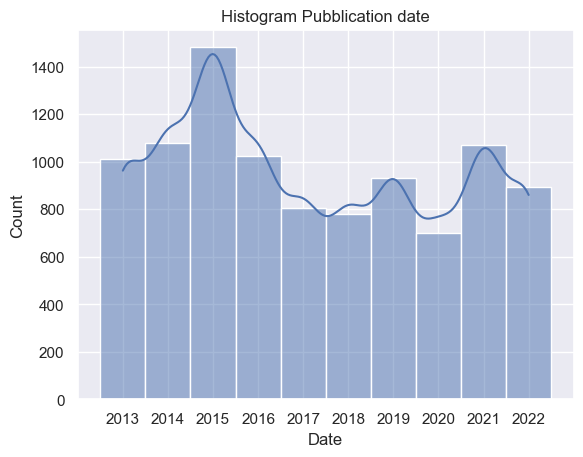

In [15]:
sns.set(style="darkgrid")
sns.histplot(data=df_3, x="Pubblication_date", kde=True).set(title='Histogram Pubblication date')
plt.xlabel('Date')
plt.show()

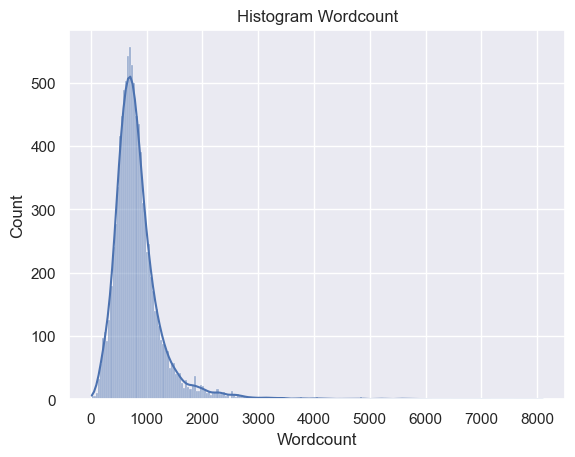

In [16]:
sns.set(style="darkgrid")
sns.histplot(data=df_3, x="Wordcount", kde=True).set(title='Histogram Wordcount')
plt.show()

32


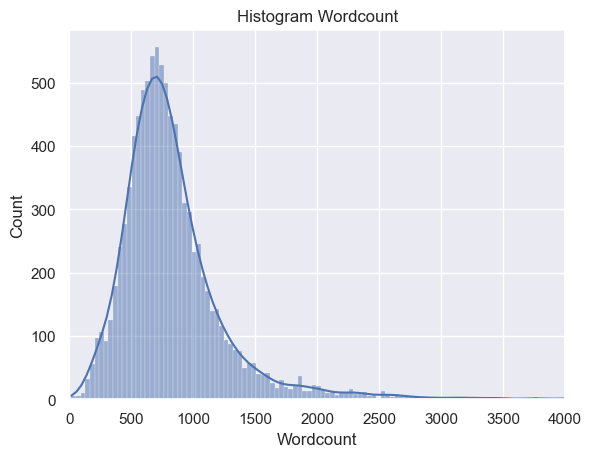

In [17]:
print(len(df_3[df_3["Wordcount"] >= 4000]))
sns.set(style="darkgrid")
sns.histplot(data=df_3, x="Wordcount", kde=True).set(title='Histogram Wordcount')
plt.xlim(0,4000)
plt.show()

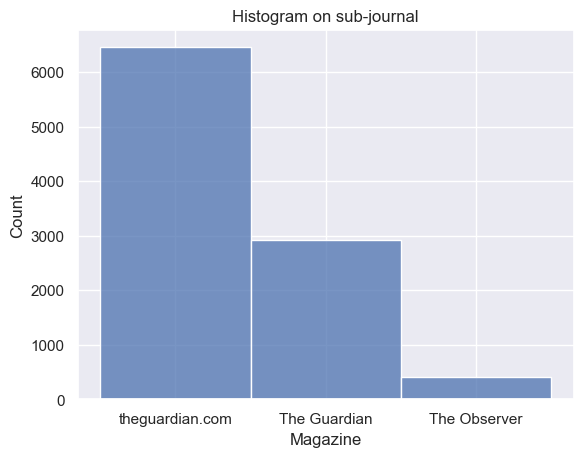

In [18]:
sns.set(style="darkgrid")
sns.histplot(data=df_3, x="Where").set(title='Histogram on sub-journal')
plt.xlabel('Magazine')
plt.show()

In [19]:
absolute_frequencies = dict()
for author in df_3['Author']:
    if author in absolute_frequencies.keys():
        absolute_frequencies[author] += 1
    else:
        absolute_frequencies[author] = 1

print(absolute_frequencies)
print(len(absolute_frequencies))

{'Andrew Simms': 41, 'Fiona Harvey, environment correspondent': 140, 'Damian Carrington': 443, nan: 137, 'Fiona Harvey and Rebecca Smithers': 1, 'Lucy Siegle': 44, 'Tracy McVeigh': 9, 'Caroline Davies': 12, 'Suzanne Goldenberg, US environment correspondent': 121, 'Laurence Caramel': 4, 'Bob Ward': 16, 'John Vidal': 130, 'Environment editor': 145, 'Adam Vaughan': 234, 'David Batty': 1, 'Ben Caldecott': 1, 'Caroline Lucas': 3, 'Robin McKie, science editor': 10, 'Fiona Harvey': 157, 'Robert Booth': 2, 'Suzanne Goldenberg US environment correspondent': 44, 'Leo Hickman': 20, 'Jonathan Watts, Latin America correspondent': 1, 'Bryony Worthington': 4, 'The Bureau of Meteorology for The Conversation ': 1, 'Oliver Milman': 345, 'James West for the Climate Desk': 1, 'Ros Donald and Christian Hunt for Carbon Brief': 1, 'Heather Stewart and Larry Elliott': 1, 'Jonathan Watts in Rio de Janeiro': 4, 'Paul Brown for The Climate News Network': 1, "John Vidal in Cox's Bazar": 1, 'Martin Wainwright': 3,

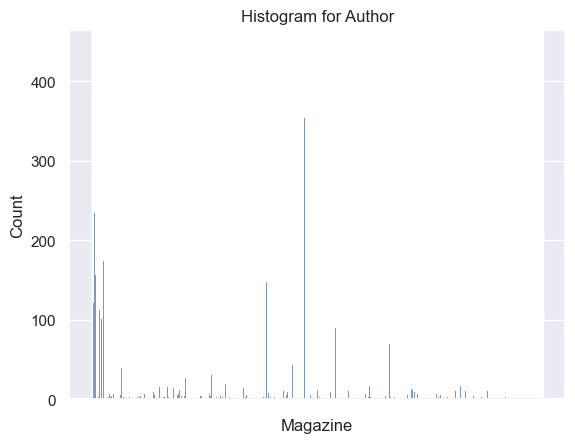

In [20]:
fig, ax = plt.subplots()
sns.set(style="darkgrid")
sns.histplot(data=df_3, x="Author", ax = ax).set(title='Histogram for Author')
plt.xlabel('Magazine')
ax.set(xticklabels=[])
plt.show()

In [21]:
absolute_frequencies_2 = {}
for key, value in absolute_frequencies.items():
    if value >= 50:
        absolute_frequencies_2[key] = value
        
absolute_frequencies_2.pop(np.nan, None)
    
absolute_frequencies_2

{'Fiona Harvey, environment correspondent': 140,
 'Damian Carrington': 443,
 'Suzanne Goldenberg, US environment correspondent': 121,
 'John Vidal': 130,
 'Environment editor': 145,
 'Adam Vaughan': 234,
 'Fiona Harvey': 157,
 'Oliver Milman': 345,
 'Terry Macalister': 58,
 'Patrick Barkham': 112,
 'Suzanne Goldenberg': 101,
 'Dana Nuccitelli': 274,
 'Graham Readfearn': 353,
 'John Abraham': 174,
 'Karl Mathiesen': 92,
 'Arthur Neslen': 90,
 'Jonathan Watts': 97,
 'Emma Howard': 87,
 'Letters': 283,
 'Fiona Harvey Environment correspondent': 393,
 'Sandra Laville': 77,
 'Oliver Milman in New York': 76,
 'Matthew Taylor': 79,
 'Michael Slezak': 147,
 'Damian Carrington Environment editor': 354,
 'Adam Morton': 59,
 'Lisa Cox': 90,
 'Emily Holden in Washington': 53,
 'Adam Morton Environment editor': 70}

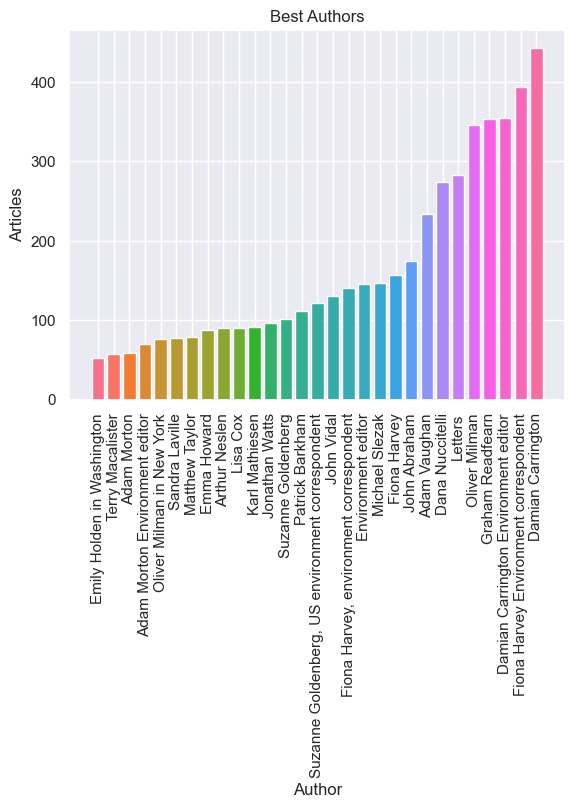

In [22]:
ind = np.arange(len(absolute_frequencies_2))
palette = sns.color_palette("husl", len(absolute_frequencies_2))
absolute_frequencies_3 = dict(sorted(absolute_frequencies_2.items(), key=lambda item: item[1]))

fig, ax = plt.subplots()
plt.bar(ind, list(absolute_frequencies_3.values()) , color=palette)
plt.xticks(ind, list(absolute_frequencies_3.keys()))
plt.xticks(rotation=90)
ax.set_xlabel('Author')
ax.set_ylabel('Articles')
ax.set_title('Best Authors')
plt.show()

In [41]:
with open("./data/stops.txt", "r") as f:
    stopwords = f.read().split('\n')
stop_w = {}

for word in stopwords:
    stop_w[word] = ''

def removestop_w(text):
    rest = []
    for word in text.split():
        if word not in stop_w:
            rest.append(word)
    return ' '.join(rest)

df_3['Bodytext_3'] = ''

for i in range(len(df_3)):
    df_3.iloc[i,11] = removestop_w(df_3.iloc[i,10].translate(str.maketrans('', '', string.punctuation)).lower().replace("“", " "))

In [42]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

df_3['Dict'] = ''

for i in range(len(df_3)):
    df_3.iloc[i,12] = str(dict(sorted(word_count(df_3.iloc[i,11]).items(), key = lambda item: item[1], reverse = True)))

In [43]:
dic_word = {}

for i in range(len(df_3)):
    dic_word[i] = dict(sorted(word_count(df_3.iloc[i,11]).items(), key = lambda item: item[1], reverse = True))
    
dic_word

{0: {'tale': 5,
  'fish': 5,
  'nightingale': 4,
  'fisherman': 4,
  'biggering': 4,
  'climate': 3,
  'change': 3,
  'people': 3,
  'good': 3,
  'tales': 3,
  '–': 3,
  'bird': 3,
  'emperor': 3,
  'greatest': 3,
  'wife': 3,
  'modern': 3,
  'archy': 3,
  'rational': 2,
  'case': 2,
  'radical': 2,
  'emissions': 2,
  'reduction': 2,
  'conference': 2,
  'tyndall': 2,
  'forces': 2,
  'sense': 2,
  'telling': 2,
  'stories': 2,
  'cultural': 2,
  'problem': 2,
  'media': 2,
  'breaks': 2,
  'words': 2,
  'goose': 2,
  'farmer': 2,
  'daily': 2,
  'bounty': 2,
  'read': 2,
  'story': 2,
  'demands': 2,
  'cut': 2,
  'inside': 2,
  'gold': 2,
  'song': 2,
  'made': 2,
  'gift': 2,
  'mechanical': 2,
  'real': 2,
  'death': 2,
  'pushkin': 2,
  'mansion': 2,
  'finally': 2,
  'tree': 2,
  'faust': 2,
  'tragedy': 2,
  'soul': 2,
  'recently': 2,
  'dr': 2,
  'lorax': 2,
  'written': 2,
  'environmental': 2,
  'truffula': 2,
  'trees': 2,
  'dark': 2,
  'letters': 2,
  'boss': 2,
  'worl

In [44]:
tot_dword = {}

for sub in dic_word.values():
    for key, ele in sub.items():
        tot_dword[key] = ele + tot_dword.get(key, 0)

tot_dword = dict(sorted(tot_dword.items(), key = lambda item: item[1], reverse = True))

tot_dword

{'climate': 63893,
 'change': 33298,
 '–': 31700,
 'energy': 21388,
 'emissions': 20051,
 'global': 17657,
 'government': 16191,
 'people': 15740,
 'carbon': 15305,
 'world': 14184,
 'year': 13908,
 'years': 13647,
 'gas': 12507,
 'uk': 11036,
 'countries': 10651,
 'report': 9894,
 'fossil': 9747,
 'water': 9523,
 'warming': 9305,
 'it’s': 9294,
 'coal': 8860,
 'time': 8829,
 'power': 8375,
 'environmental': 8171,
 'oil': 7810,
 'action': 7670,
 'australia': 7519,
 'make': 7437,
 'scientists': 7333,
 'environment': 7321,
 'industry': 6993,
 'fuel': 6978,
 'research': 6660,
 'future': 6653,
 'including': 6558,
 'companies': 6515,
 'green': 6457,
 'species': 6418,
 'national': 6406,
 'public': 6397,
 'science': 6370,
 'paris': 6365,
 'found': 6281,
 'policy': 6119,
 'made': 6000,
 'sea': 5769,
 'support': 5417,
 'greenhouse': 5369,
 'food': 5295,
 'pollution': 5260,
 'part': 5257,
 'university': 5225,
 'work': 5089,
 'crisis': 5065,
 'international': 5041,
 'levels': 4887,
 'told': 4860,

In [45]:
Best_tot_dwords = {}
for key, value in tot_dword.items():
    if value >= 8000:
        Best_tot_dwords[key] = value
    
Best_tot_dwords.pop('–', None)
len(Best_tot_dwords)

23

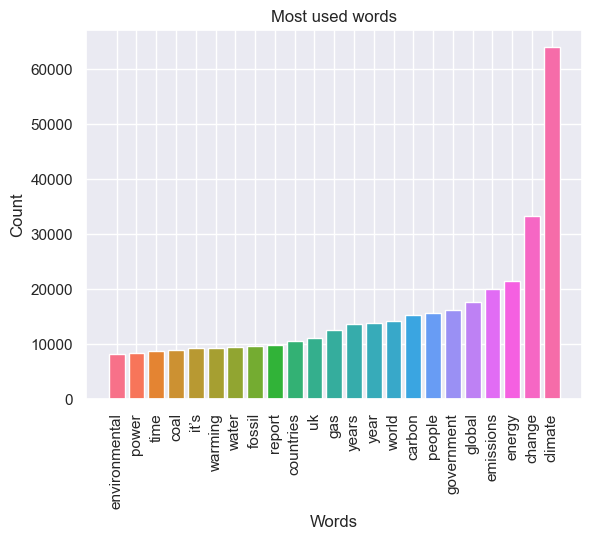

In [46]:
ind = np.arange(len(Best_tot_dwords))
palette = sns.color_palette("husl", len(Best_tot_dwords))
Best_tot_dwords_2 = dict(sorted(Best_tot_dwords.items(), key=lambda item: item[1]))

fig, ax = plt.subplots()
plt.bar(ind, list(Best_tot_dwords_2.values()) , color=palette)
plt.xticks(ind, list(Best_tot_dwords_2.keys()))
plt.xticks(rotation=90)
ax.set_xlabel('Words')
ax.set_ylabel('Count')
ax.set_title('Most used words')
plt.show()